In [1]:
import shap
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
feature_columns = [ 'Volume of aeration tanks (m3)', 'Actual Inf rate (m3/d)', '‚ÑÉ Temp.Max.SamplingDate', '‚ÑÉ Temp.Avg.SamplingDate', '‚ÑÉ Temp.Min.SamplingDate', '‚ÑÉ Dew.Max.SamplingDate',
 '‚ÑÉ Dew.Avg.SamplingDate', '‚ÑÉ Dew.Min.SamplingDate', '‚ÑÉ Humidity.Max.SamplingDate', '‚ÑÉ Humidity.Min.SamplingDate', '‚ÑÉ Wind.Max.SamplingDate', '‚ÑÉ Wind.Min.SamplingDate',
 '‚ÑÉ Pressure.Max.SamplingDate', '‚ÑÉ Pressure.Min.SamplingDate', '‚ÑÉ Precipitation.SamplingDate', '‚ÑÉ Temp.Max.WeekMean', '‚ÑÉ Temp.Avg.WeekMean', '‚ÑÉ Temp.Min.WeekMean',
 '‚ÑÉ Dew.Max.WeekMean', '‚ÑÉ Dew.Avg.WeekMean', '‚ÑÉ Dew.Min.WeekMean', '‚ÑÉ Humidity.Max.WeekMean', '‚ÑÉ Humidity.Min.WeekMean', '‚ÑÉ Wind.Max.WeekMean', '‚ÑÉ Wind.Min.WeekMean',
 '‚ÑÉ Pressure.Max.WeekMean', '‚ÑÉ Pressure.Min.WeekMean', '‚ÑÉ Precipitation.WeekMean', '‚ÑÉ Temp.Max.WeekMax', '‚ÑÉ Temp.Avg.WeekMax', '‚ÑÉ Temp.Min.WeekMax', '‚ÑÉ Dew.Max.WeekMax',
 '‚ÑÉ Dew.Avg.WeekMax', '‚ÑÉ Dew.Min.WeekMax', '‚ÑÉ Humidity.Max.WeekMax', '‚ÑÉ Humidity.Min.WeekMax', '‚ÑÉ Wind.Max.WeekMax', '‚ÑÉ Wind.Min.WeekMax', '‚ÑÉ Pressure.Max.WeekMax',
 '‚ÑÉ Pressure.Min.WeekMax', '‚ÑÉ Precipitation.WeekMax', '‚ÑÉ Precipitation.WeekAccum', '‚ÑÉ Precipitation.MonthAccum', '‚ÑÉ Ambient temperature (‚ÑÉ)', 
 'SRT (days)', 'Precip (inch)', 'Recycle ratio (total return sludge flow/total influent flow)', 
   'Position_enc', 'Country_enc', 'City_enc', 'Plant_enc', 'Year', 'Month', 'Day', 'Weekday', ]

target_column = [ 'COD (mg/l) In', 'BOD7 (mg/l) In', 'NH3 (mg/L) In', 'Total Nitrogen (mg/L) In', 
 'Total Phosphorus (mg/L) In', 'pH AS', 'DO (mg/L) AS', 'Temp (oC) AS', 'MLSS (mg/l) AS', 'MLVSS (mg/l) AS', 'SVI (ml/g) AS',]

In [3]:
original_df = pd.read_csv("../0. Data/modelling_data_250326.csv")
original_df = original_df.fillna(original_df.mean())
original_df = original_df.drop(columns=["Recycle ratio (total return sludge flow/total influent flow).1"])

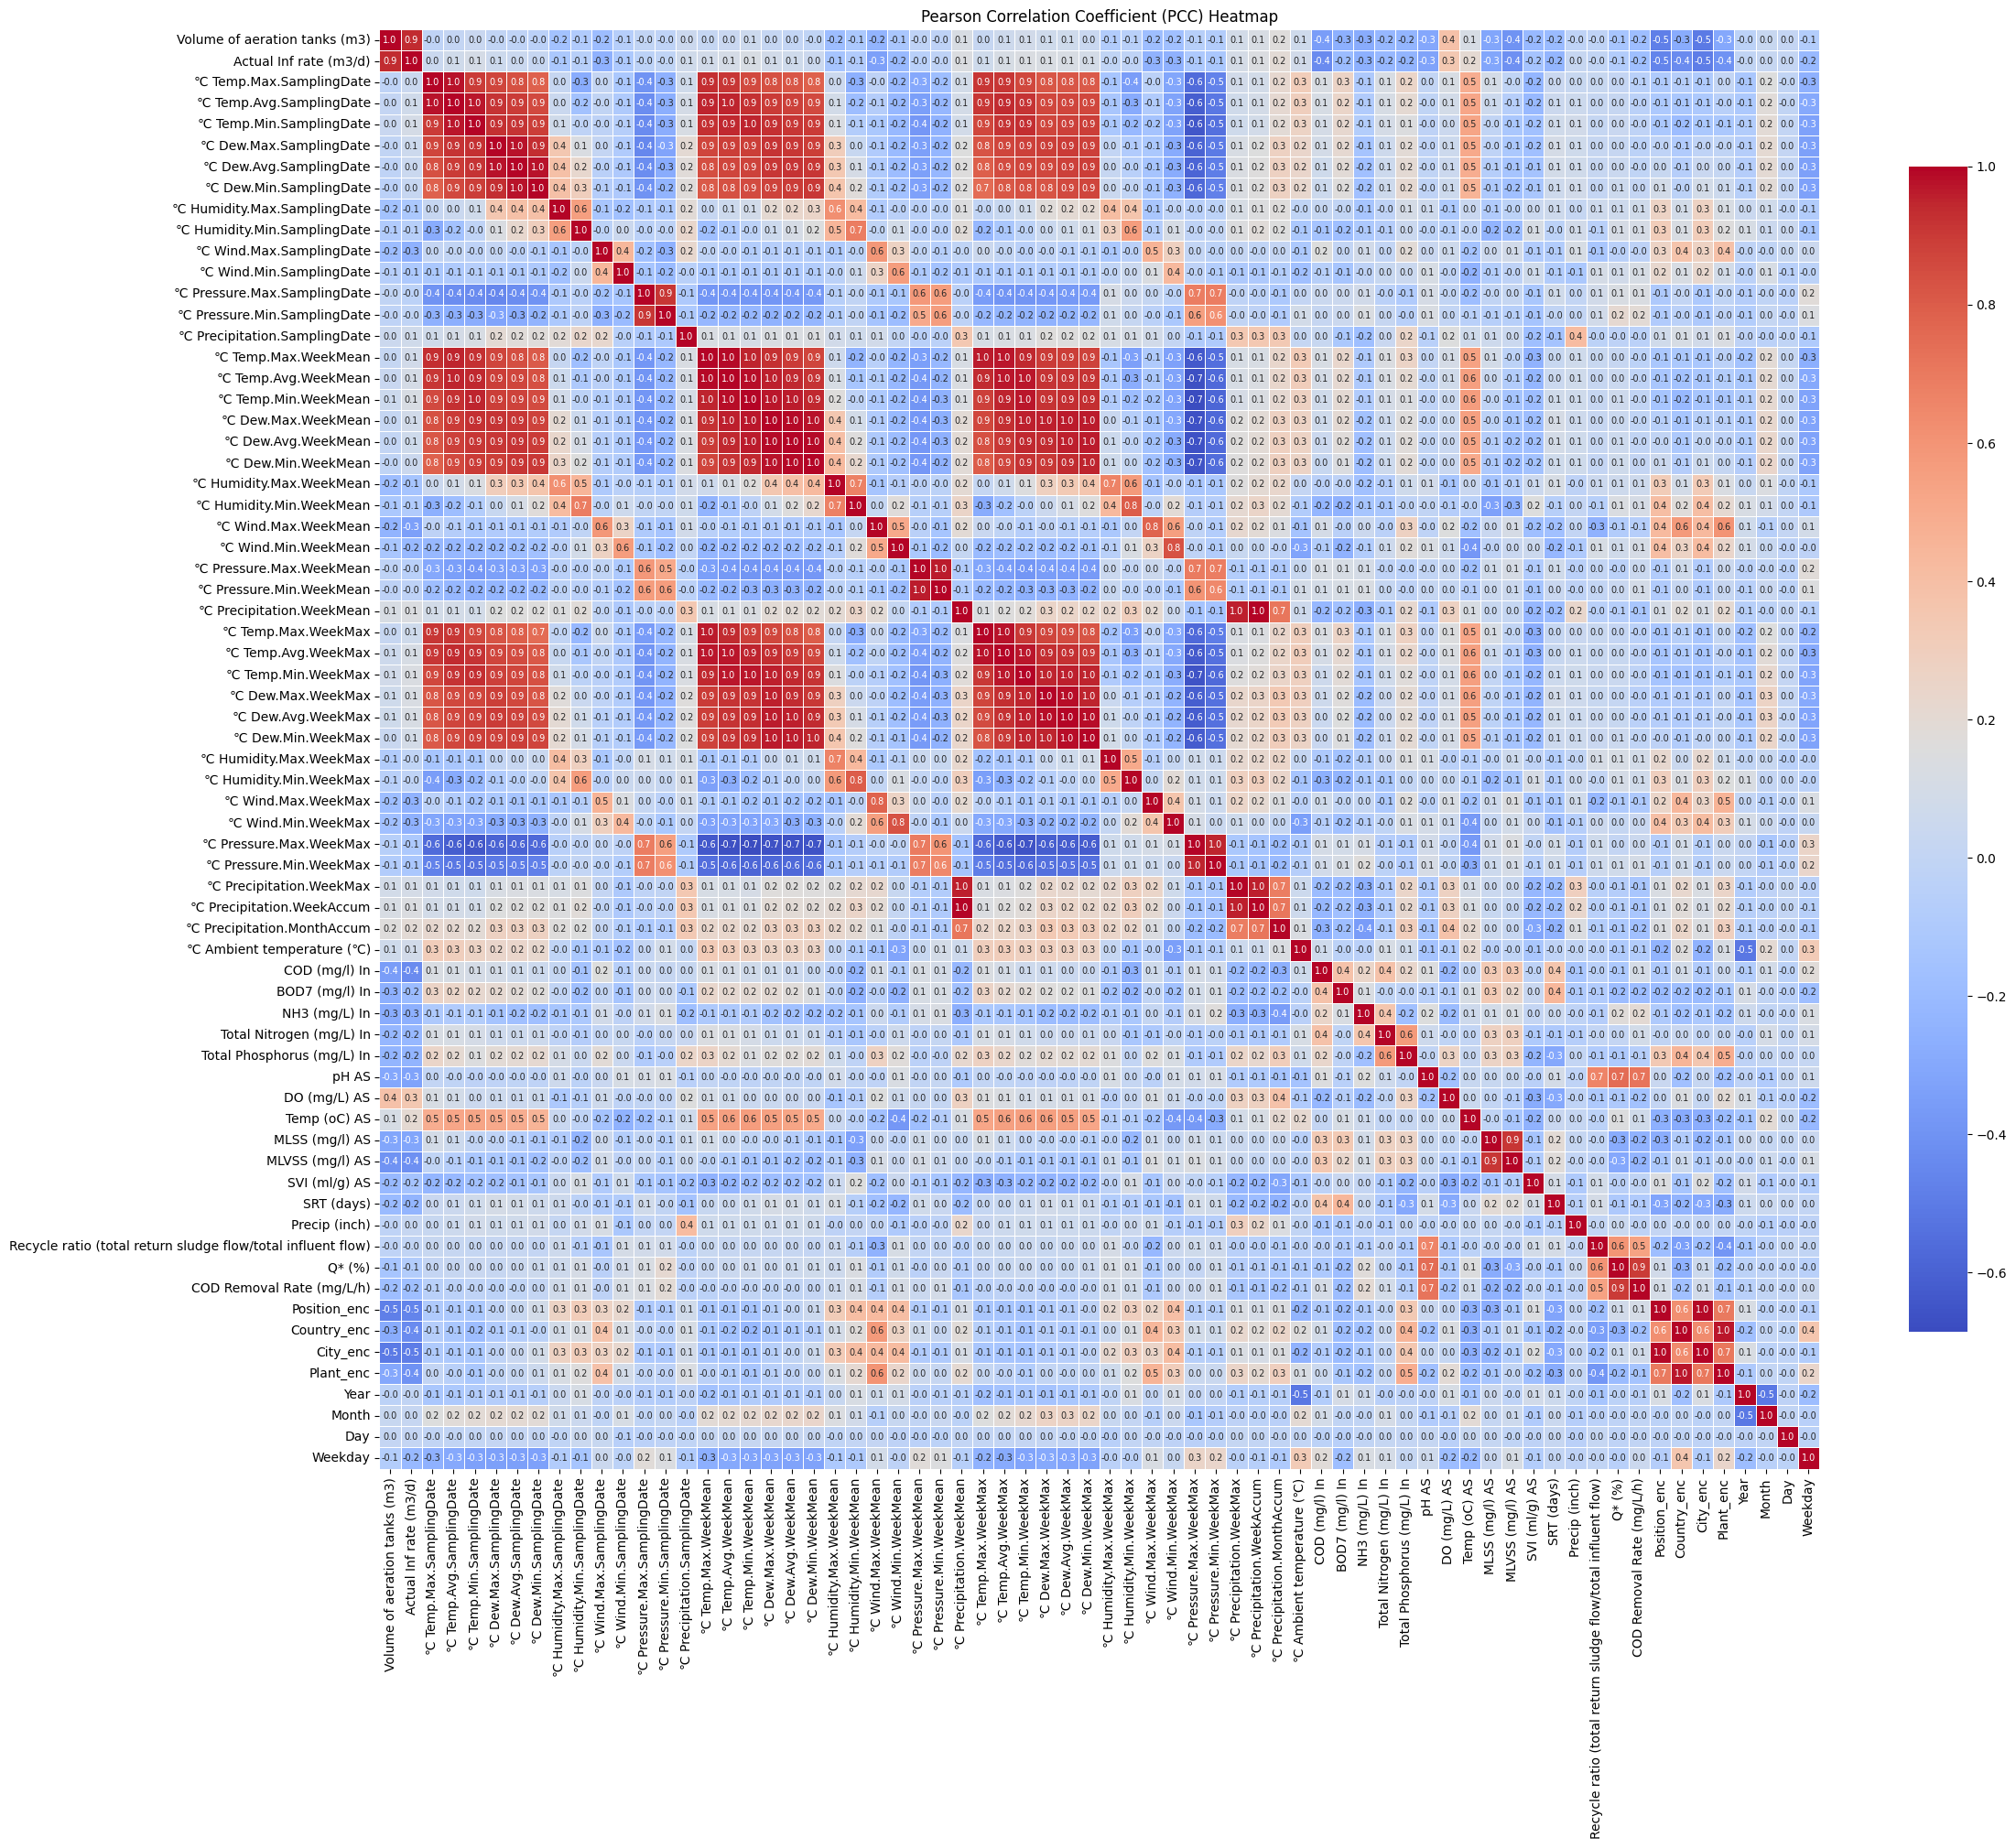

In [4]:
# üîπ ÏÉÅÍ¥ÄÍ≥ÑÏàò ÌñâÎ†¨ Í≥ÑÏÇ∞ (PCC)
corr_matrix = original_df.corr(method='pearson')

# üîπ ÌûàÌä∏Îßµ ÏãúÍ∞ÅÌôî
plt.figure(figsize=(24, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.5, annot_kws={"size": 7})
plt.title("Pearson Correlation Coefficient (PCC) Heatmap")
plt.tight_layout()
plt.show()

In [5]:
X = original_df[feature_columns]

y = original_df[target_column]

In [8]:
y_train

COD (mg/l) In  BOD7 (mg/l) In  NH3 (mg/L) In  Total Nitrogen (mg/L) In  \
803      864.350000       227.21037      50.780000                 50.780000   
126      438.844077       240.00000      37.000000                 50.000000   
513      108.000000       227.21037       0.174486                  2.264706   
829      438.844077       227.21037      29.677411                 43.586441   
840      438.844077       227.21037      29.677411                 43.586441   
...             ...             ...            ...                       ...   
14       169.000000       227.21037      25.000000                 34.500000   
199      369.000000       227.21037      79.000000                 43.586441   
31       326.000000       227.21037      36.800000                 31.300000   
523       98.000000       227.21037       8.340381                  4.272549   
1026     470.000000       267.00000      24.900000                 28.500000   

      Total Phosphorus (mg/L) In     pH AS  DO (mg/L) AS  Temp (oC) AS  \
803                     5.030000  7.210000      0.080000     21.720000   
126                     5.200000  7.300000      0.290000     17.800000   
513                     2.498574  6.450000      6.700000     29.900000   
829                    22.798358  7.078222      3.814061     19.639604   
840                    22.798358  7.078222      3.814061     19.639604   
...                          ...       ...           ...           ...   
14                      6.860000  5.710000      1.870000     12.700000   
199                    22.798358  6.640000      6.730000     21.916667   
31                      4.050000  6.710000      1.970000     16.900000   
523                     1.924686  6.370000      7.400000     29.200000   
1026                   57.000000  7.040000      5.770000      0.300000   

      MLSS (mg/l) AS  MLVSS (mg/l) AS  SVI (ml/g) AS  
803      4241.519231      3293.820529     143.178634  
126      2900.000000      3293.820529     166.000000  
513      2243.000000      1086.000000     143.178634  
829      4241.519231      3293.820529     143.178634  
840      4241.519231      3293.820529     143.178634  
...              ...              ...            ...  
14       2690.000000      1930.000000     204.000000  
199      2175.000000      1825.000000     120.000000  
31       3310.000000      2390.000000     199.000000  
523      2079.000000      1300.000000     143.178634  
1026     5776.000000      4396.000000     142.000000  

[875 rows x 11 columns]

In [6]:
# üîπ 3. Split the data into training and test sets (70:30 split with random seed 1004)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1004)

# üîπ 4. Normalize feature values using standard scaling (zero mean, unit variance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("NaNs in X_train:", np.isnan(X_train_scaled).sum())
print("NaNs in y_train:", np.isnan(y_train).sum())
print("Infs in X_train:", np.isinf(X_train_scaled).sum())
print("Infs in y_train:", np.isinf(y_train).sum())

NaNs in X_train: 0
NaNs in y_train: COD (mg/l) In                 0
BOD7 (mg/l) In                0
NH3 (mg/L) In                 0
Total Nitrogen (mg/L) In      0
Total Phosphorus (mg/L) In    0
pH AS                         0
DO (mg/L) AS                  0
Temp (oC) AS                  0
MLSS (mg/l) AS                0
MLVSS (mg/l) AS               0
SVI (ml/g) AS                 0
dtype: int64
Infs in X_train: 0
Infs in y_train: COD (mg/l) In                 0
BOD7 (mg/l) In                0
NH3 (mg/L) In                 0
Total Nitrogen (mg/L) In      0
Total Phosphorus (mg/L) In    0
pH AS                         0
DO (mg/L) AS                  0
Temp (oC) AS                  0
MLSS (mg/l) AS                0
MLVSS (mg/l) AS               0
SVI (ml/g) AS                 0
dtype: int64


In [12]:
# üîπ 5. Build a 3-layer deep neural network (MLP) for regression
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(11)  # Output layer without activation for regression
])

# üîπ 6. Compile the model using Mean Squared Error loss and Adam optimizer
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# üîπ 7. Train the model with validation on the test set
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=800,
                    batch_size=32,
                    verbose=1)



Epoch 1/800


/Users/k23070952/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 3ms/step - loss: 3471093.5000 - mae: 776.8885 - val_loss: 3463358.7500 - val_mae: 775.8950
Epoch 2/800
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 938us/step - loss: 3280081.0000 - mae: 749.1478 - val_loss: 3397876.0000 - val_mae: 760.5080
Epoch 3/800
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 964us/step - loss: 3217863.2500 - mae: 734.8216 - val_loss: 3080140.2500 - val_mae: 710.8242
Epoch 4/800
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 853us/step - loss: 2928744.2500 - mae: 692.2634 - val_loss: 2240504.2500 - val_mae: 602.9318
Epoch 5/800
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 801us/step - loss: 1738509.2500 - mae: 531.2046 - val_loss: 1265731.3750 - val_mae: 437.8944
Epoch 6/800
28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 846us/step - loss: 1073365.6250 - mae: 400.9441 - val_los

In [13]:
# üîπ 8. Prediction
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)


28/28 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 807us/step
12/12 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 346us/step


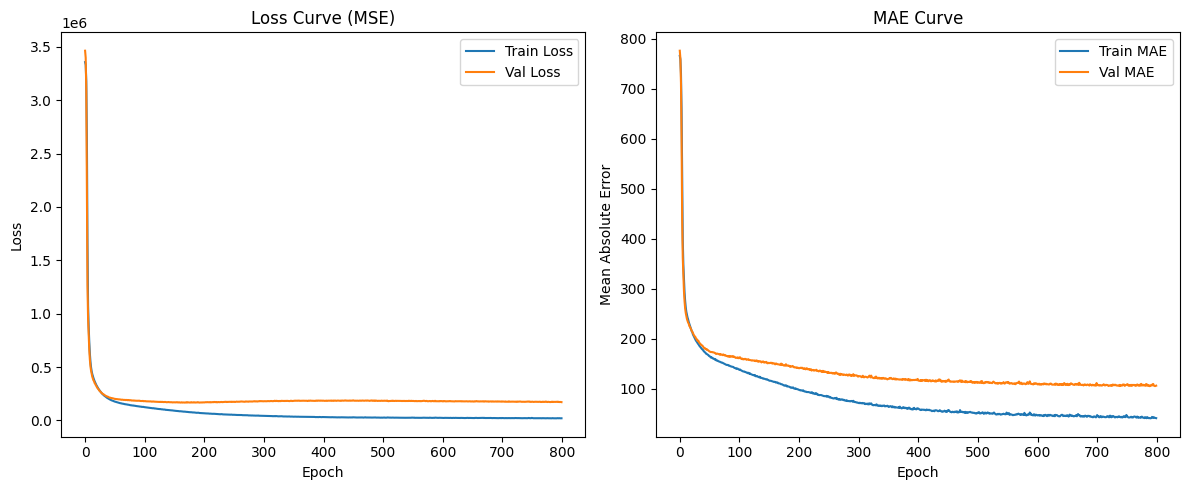

In [14]:
# üîπ 9. Plot training and validation loss/MAE over epochs
plt.figure(figsize=(12, 5))

# Plot MSE loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss Curve (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot MAE
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Val MAE')
plt.title('MAE Curve')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.legend()

plt.tight_layout()
plt.show()



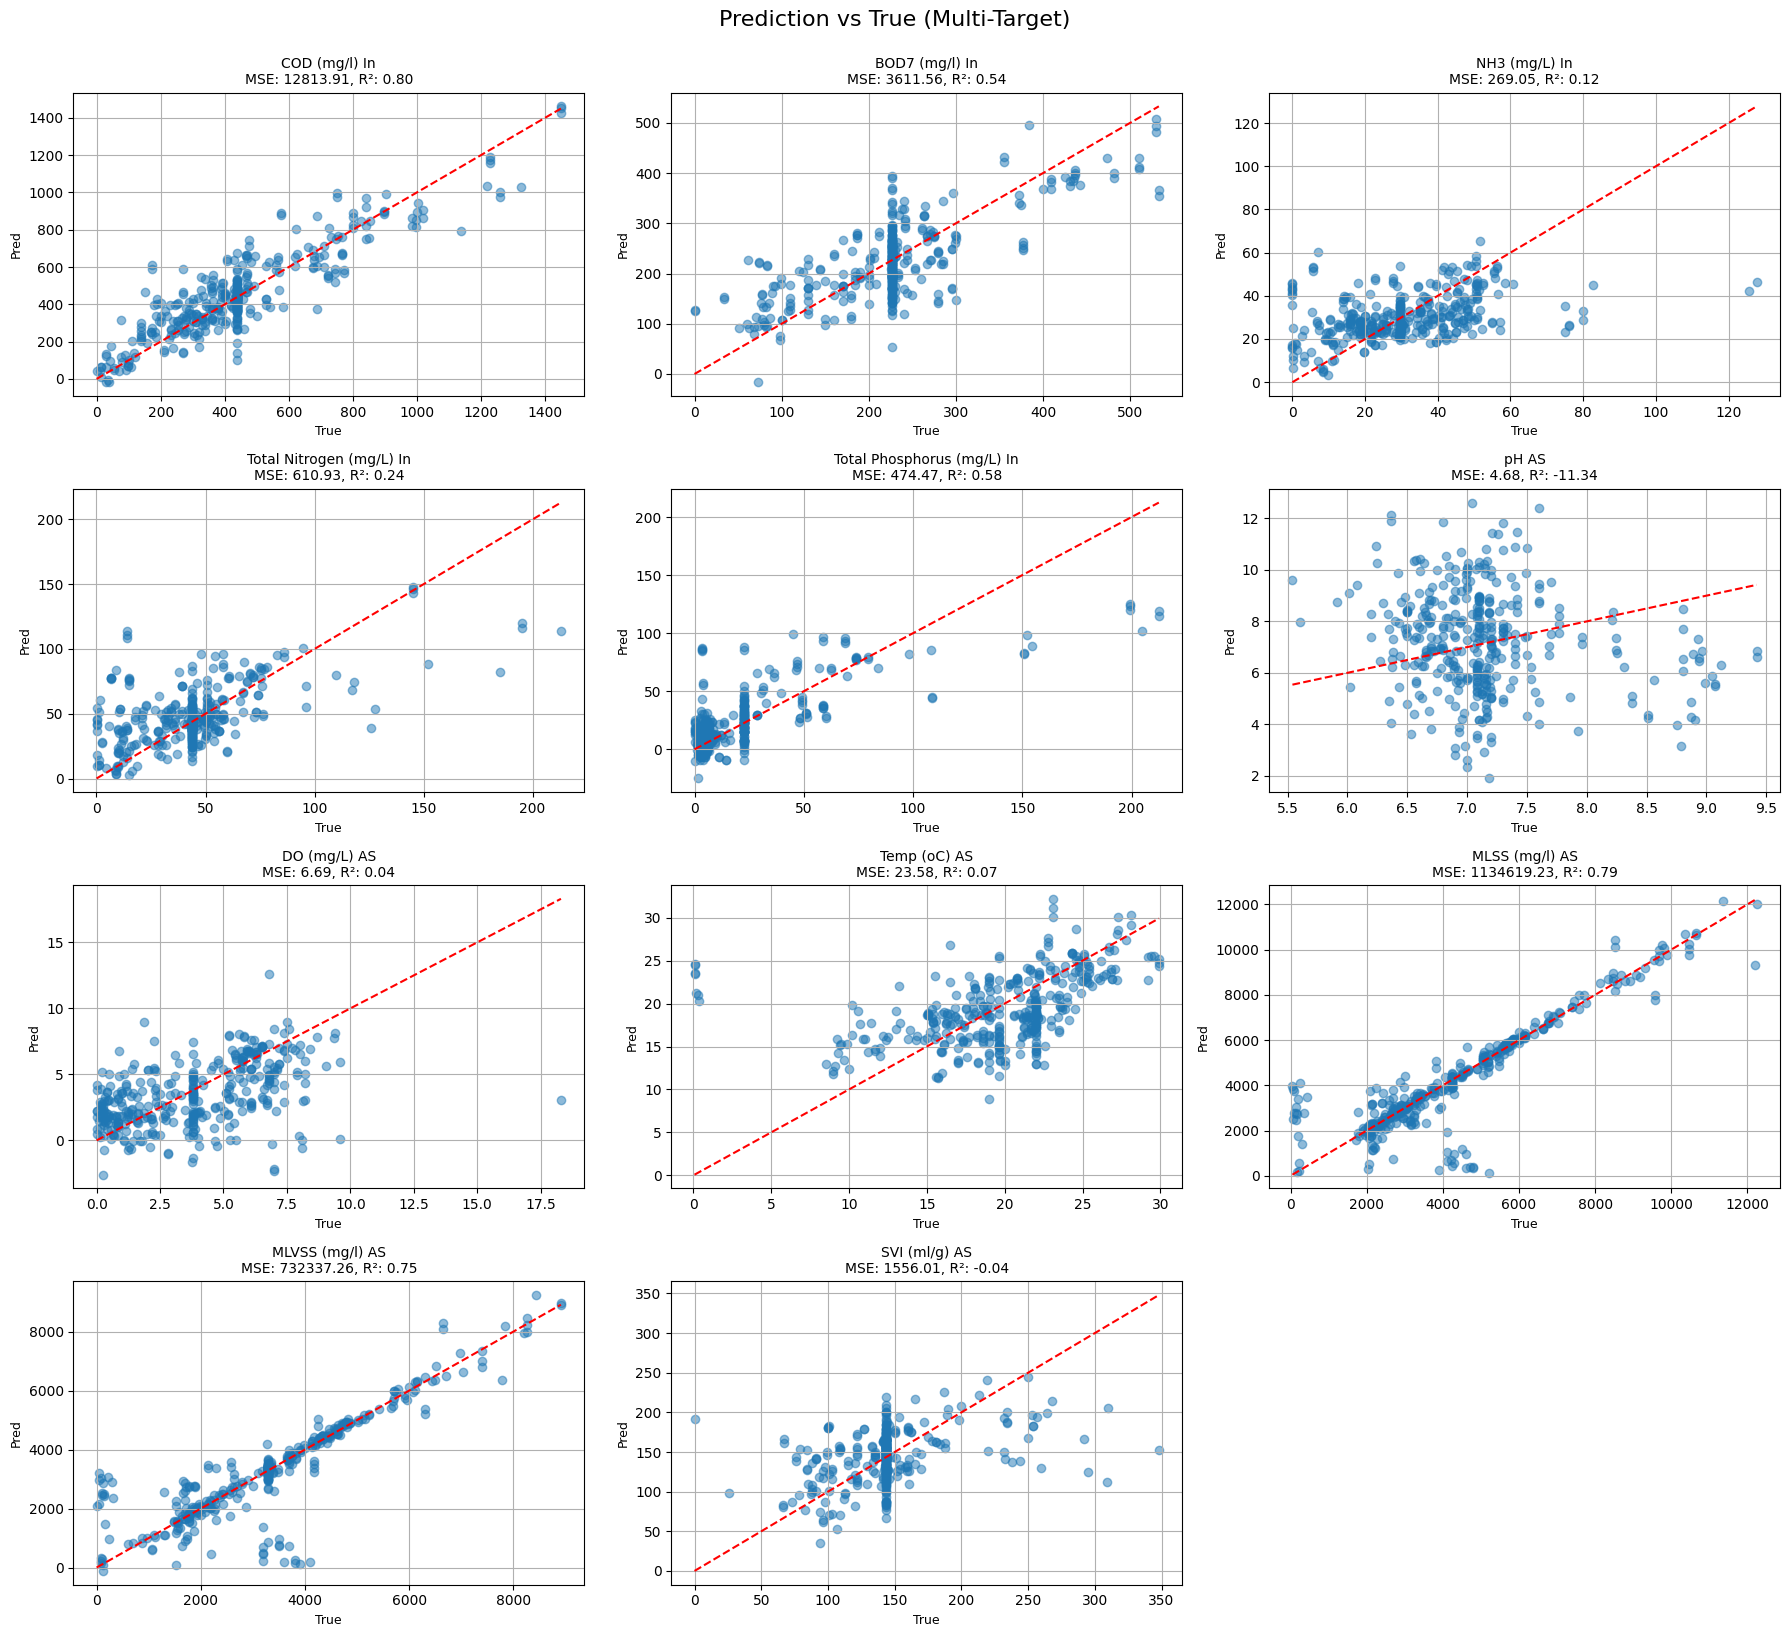

In [16]:
# ÌÉÄÍ≤ü Ïª¨Îüº Î¶¨Ïä§Ìä∏ (Ï¥ù 11Í∞ú)
target_columns = [ 'COD (mg/l) In', 'BOD7 (mg/l) In', 'NH3 (mg/L) In', 'Total Nitrogen (mg/L) In', 
                   'Total Phosphorus (mg/L) In', 'pH AS', 'DO (mg/L) AS', 'Temp (oC) AS',
                   'MLSS (mg/l) AS', 'MLVSS (mg/l) AS', 'SVI (ml/g) AS' ]

# ÏòàÏ∏°Í∞í DataFrameÏúºÎ°ú Î≥ÄÌôò
y_test_df = pd.DataFrame(y_test, columns=target_columns)
y_test_pred_df = pd.DataFrame(y_test_pred, columns=target_columns)

# 4x3 ÏÑúÎ∏åÌîåÎ°Ø ÏÉùÏÑ±
fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()  # 2D -> 1D Î∞∞Ïó¥Î°ú Î≥ÄÌôò

for i, col in enumerate(target_columns):
    ax = axes[i]
    ax.scatter(y_test_df[col], y_test_pred_df[col], alpha=0.5)
    ax.plot([y_test_df[col].min(), y_test_df[col].max()],
            [y_test_df[col].min(), y_test_df[col].max()],
            'r--')

    mse = mean_squared_error(y_test_df[col], y_test_pred_df[col])
    r2 = r2_score(y_test_df[col], y_test_pred_df[col])
    
    ax.set_title(f"{col}\nMSE: {mse:.2f}, R¬≤: {r2:.2f}", fontsize=10)
    ax.set_xlabel("True", fontsize=9)
    ax.set_ylabel("Pred", fontsize=9)
    ax.grid(True)

# Îπà Ïπ∏ ÎπÑÏö∞Í∏∞ (Ï¥ù 12Í∞ú Ï§ë ÎßàÏßÄÎßâ 1Í∞úÎäî ÎπÑÏñ¥ ÏûàÏùå)
if len(target_columns) < len(axes):
    for j in range(len(target_columns), len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Prediction vs True (Multi-Target)", fontsize=16, y=1.02)
plt.show()